## UNSUPERVISED LEARNING MINI PROJECT

### CONTEXT

> E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### CONTENT
> This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

> The data set contains 500K rows and 8 columns. The following is the description of each column.

> - **TransactionNo (categorical)**: a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
> - **Date (numeric)**: the date when each transaction was generated.
> - **ProductNo (categorical)**: a five or six-digit unique character used to identify a specific product.
> - **Product (categorical)**: product/item name.
> - **Price (numeric)**: the price of each product per unit in pound sterling (£).
> - **Quantity (numeric)**: the quantity of each product per transaction. Negative values related to cancelled transactions.
> - **CustomerNo (categorical)**: a five-digit unique number that defines each customer.
> - **Country (categorical)**: name of the country where the customer resides.

### GOAL

> Gather useful intrinsic information by combining RFM model and some unsupervised learning model. 

> For each segments, analyze the data, and try to answer the following questions:

> - How was the sales trend over the months?
> - What are the most frequent purchased products?
> - How many products does the customer purchase in each transaction?
> - How does each cluster/group contribute to the company's revenue?
> - What are the interval date between transactions?
> - Based on your findings, what strategy could you recommend to the business to gain more profit?
> - ***add more if necessary***

> Also, there is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once. 

> Therefore, try to build a supervised learning model to solve this problem.

> Source from UCI Machine Learning Repository: [link to dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

## OVERVIEW

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(1)

1


> Here we will inspect the data for quality checking.

https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

In [3]:
# load data
df = pd.read_excel("data/Online Retail.xlsx")

In [4]:
# check head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> We can see that there are 2 features with missing values (null).

In [6]:
# check null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## PREPROCESSING

> Since many of the missing values is on the important features (CustomerID), and it's considered as an identifier that will plays an important role to the RFM models, therefore we cannot do anything to this other than dropping the values on this features.

In [7]:
# dropna
df = df.dropna()

In [8]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


> Since the missing values has been handled, next we will try to create a new features (TotalCost) that will play an important role on RFM for monetary value later.

> *TotalCost = Quantity x UnitPrice*.

In [9]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["UnitPrice"]

In [10]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


> Then we will adjust the InvoiceDate format. We will create a new feature for it, so that it will fit the RFM model.

In [11]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [12]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


> We will also prepare the 'target' feature for supervised prediction later.

In [13]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["InvoiceNo"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [14]:
# apply target
df["cancelled"] = cancel

In [15]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 37.2+ MB


> Now that we've finished the preprocess, we will copy the data and then start to build the rfm model.

In [16]:
# create copy for rfm modeling
df1 = df.copy()

## RFM MODEL BUILDING


> First, we make RFM table that contains Recency, Frequency, and Monetary group by CustomerID

In [18]:
now = pd.to_datetime(df['TransactionDate'].max())

In [19]:
#get cust last trans date
recency = df.groupby(by='CustomerID', as_index=False)['TransactionDate'].max()
recency.columns = ['CustomerID','TransactionDate']

In [20]:
#calcu regency
recency['TransactionDate'] = pd.to_datetime(recency['TransactionDate'])
recency['recency'] = recency['TransactionDate'].apply(lambda x: (now - x).days)

In [21]:
recency.head()

,CustomerID,TransactionDate,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [22]:
frequency = pd.DataFrame()
frequency['CustomerID'] = [i for i in df['CustomerID'].unique()]
frequency['frequency'] = df.groupby('CustomerID')['CustomerID'].transform('count')

frequency["frequency"] = df.groupby('CustomerID', as_index=False)["CustomerID"].count()


In [23]:
frequency.head()

,CustomerID,frequency
0,17850.0,2
1,13047.0,182
2,12583.0,31
3,13748.0,73
4,15100.0,17


In [24]:
monetary = df.groupby(by='CustomerID', as_index=False).agg({'TotalCost' : 'sum'})
monetary.columns = ['CustomerID','monetary']

In [25]:
monetary.head()

,CustomerID,monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [26]:
# create rfm table
rf = pd.merge(recency, frequency, on = "CustomerID")
rfm = pd.merge(rf, monetary, on = "CustomerID")


In [27]:
# split rfm quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles


,CustomerID,recency,frequency,monetary
0.25,13812.75,16.0,17.0,293.3625
0.50,15300.50,50.0,42.0,648.0750
0.75,16778.25,143.0,102.0,1611.7250


In [28]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


In [29]:
# rfm segmentation score
rfm['R_Quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles))
rfm['F_Quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['M_Quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))


In [30]:
# calculate rfm score
rfm['RFMScore'] =  rfm["R_Quartile"].map(str) + rfm["F_Quartile"].map(str) + rfm["M_Quartile"].map(str)


In [31]:
# set segment name, urutannya dari atas
segname=[]
for i,j,k in zip(rfm["RFMScore"], rfm["F_Quartile"], rfm["M_Quartile"]):
    if i == "111":
        segname.append("Best Customers")
    elif i == "311":
        segname.append("Almost Lost")
    elif i == "411":
        segname.append("Lost Customers")
    elif i == "444":
        segname.append("Lost Cheap Customers")
    elif j == 1:
        segname.append("Loyal Customers")
    elif k == 1:
        segname.append("Big Spenders")
    else:
        segname.append("Other")


In [32]:
# get segment name
rfm["segment"] = segname


In [33]:
# jumlah masing2 segment
cnt_seg = rfm.groupby("segment", as_index=False)["CustomerID"].nunique().sort_values(by = "CustomerID", ascending=False).reset_index()
# tambahkan kolom percentage
cnt_seg["pct"] = round(cnt_seg["CustomerID"]/sum(cnt_seg["CustomerID"]) *100, 1)

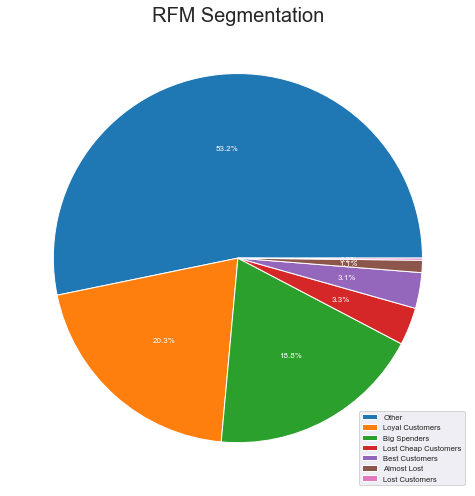

In [34]:
# visualisasi hasil
plt.figure(figsize=(7,7))
plt.pie(cnt_seg["CustomerID"], 
        autopct = '%.1f%%', 
        textprops = {'fontsize' : 8, 
                     'color' : 'white'})
plt.title("RFM Segmentation", fontsize=20)
plt.legend(cnt_seg["segment"], loc='lower right', prop={'size': 7.7})
plt.tight_layout()
plt.show()


In [35]:
# takeout other
seg_new = cnt_seg[cnt_seg["segment"]!="Other"]


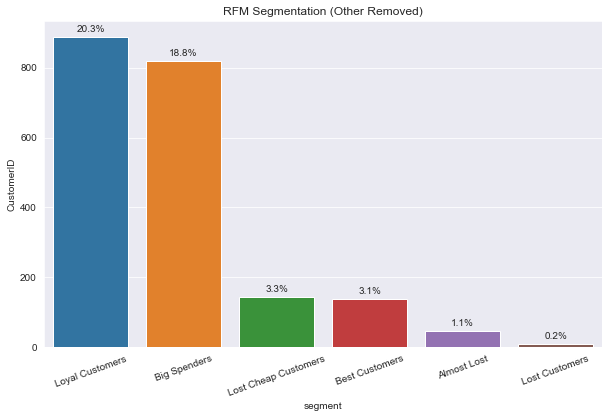

In [36]:
# visualisasi dengan barplot (takeout other segment)
plt.figure(figsize=(10,6))
x = seg_new["segment"]
y = seg_new["CustomerID"]
percentage = [i for i in seg_new["pct"]]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate(f'{percentage[i]}%', (x, y), ha='center')
plt.title("RFM Segmentation (Other Removed)")
plt.xticks(rotation=20)
plt.show()


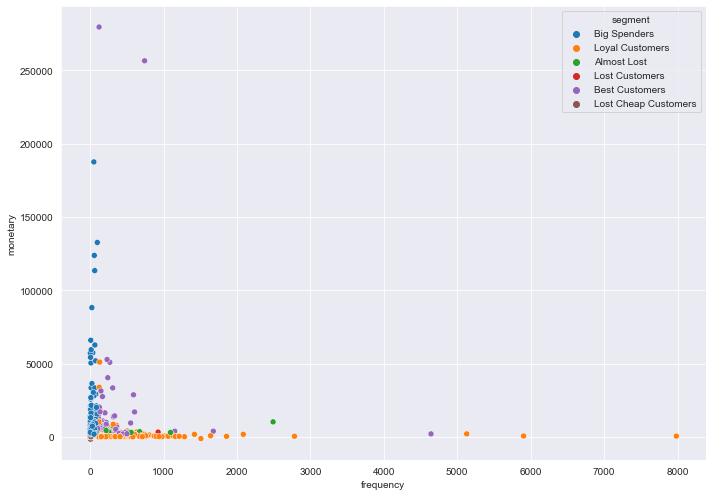

In [37]:
# visualisasi dengan scatter (takeout other segment)
plt.figure(figsize=(10,7))
sns.scatterplot(data=rfm[rfm["segment"]!="Other"], 
                x="frequency", 
                y="monetary", 
                hue="segment")
plt.tight_layout()
plt.show()


In [38]:
cnt_seg

,index,segment,CustomerID,pct
0,6,Other,2327,53.2
1,5,Loyal Customers,889,20.3
2,2,Big Spenders,820,18.8
3,3,Lost Cheap Customers,144,3.3
4,1,Best Customers,137,3.1
5,0,Almost Lost,47,1.1
6,4,Lost Customers,8,0.2


> Summary:

> After calculating the number and visualizing the segments of the rfm score, we get:

> 1. The number of **'Other'** segments is still around 40%, this can still be done by segmentation to get further segment insights.

> 2. The highest number after that is in the **'Big Spender'** and **'Loyal Customers'** segments, meaning that the number of healthy customers is still high with a total percentage of 50%. Special campaign programs can be made to increase the number of customers in this category.

> 3. The number of **'Best Customer'** is still around 4.9%. It is better to do a loyalty program, in order to protect this customer.

> 4. If we consider **'Lost Cheap Customers'**, **'Lost Customers'**, and **'Almost Lost'** are churn customers, then the number of churned customers is around 4.4% of the total customers, where this is still reasonable. If necessary, retargeting of these customers can be carried out.

## CLUSTERING


In [40]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

# Library untuk clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Library untuk DB Index untuk mengukur hasil clustering
from sklearn.metrics import davies_bouldin_score

In [41]:
rfm.columns

Index(['CustomerID', 'TransactionDate', 'recency', 'frequency', 'monetary',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMScore', 'segment'],
      dtype='object')

In [42]:
rfm.head()

,CustomerID,TransactionDate,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment
0,12346.0,2011-01-18,325,33,0.00,4,3,4,434,Other
1,12347.0,2011-12-07,2,72,4310.00,1,2,1,121,Big Spenders
2,12348.0,2011-09-25,75,22,1797.24,3,3,1,331,Big Spenders
3,12349.0,2011-11-21,18,454,1757.55,2,1,1,211,Loyal Customers
4,12350.0,2011-02-02,310,107,334.40,4,1,3,413,Loyal Customers


In [43]:
rfm.isna().sum()

CustomerID         0
TransactionDate    0
recency            0
frequency          0
monetary           0
R_Quartile         0
F_Quartile         0
M_Quartile         0
RFMScore           0
segment            0
dtype: int64

In [44]:
rfm1 = rfm.copy()
rfm1 = rfm1.dropna()

In [45]:
# ubah menjadi bentuk array
X = np.asarray(rfm[["recency", "monetary"]])

### K-MEANS

In [46]:
# range k dari Kmeans
k = range(1, 10)
inertia = [] 
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X)
    inertia.append(model.inertia_)

In [47]:
for i,j in enumerate(inertia):
    print(f'iterasi {i} - inertia = {j}')

iterasi 0 - inertia = 295338808219.3727
iterasi 1 - inertia = 100057878094.20789
iterasi 2 - inertia = 49222777286.930336
iterasi 3 - inertia = 30246399058.472115
iterasi 4 - inertia = 17858016241.76866
iterasi 5 - inertia = 11668509630.05867
iterasi 6 - inertia = 8467881253.409412
iterasi 7 - inertia = 5504603249.735125
iterasi 8 - inertia = 4082218715.314796


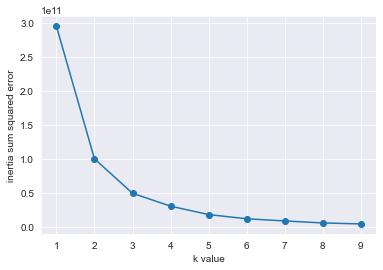

In [48]:
# plot elbow curve
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()


In [49]:
model_km = KMeans(n_clusters=4, max_iter=1000, random_state=0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [50]:
rfm['cluster_km'] = model_km.predict(X)

In [51]:
rfm['cluster_km'].value_counts()

0    4252
3     102
2      15
1       3
Name: cluster_km, dtype: int64

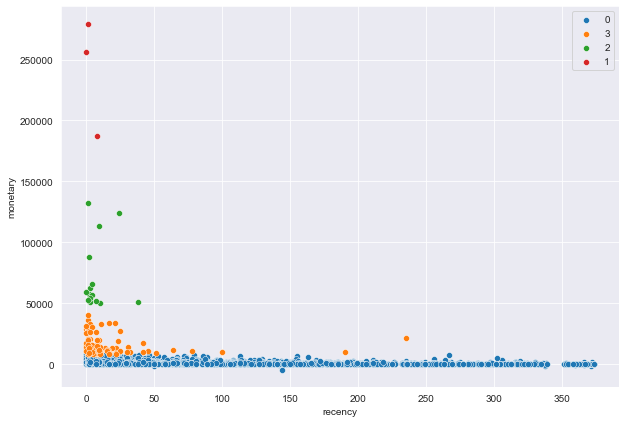

In [52]:
plt.figure(figsize=(10,7))
for i in rfm['cluster_km'].unique():
    sns.scatterplot(rfm['recency'][rfm['cluster_km']==i],rfm['monetary'][rfm['cluster_km']==i], label=i)
plt.legend()
plt.show()

> - **Cluster 0** is a group of customers who have low monetary and diverse recencies
> - **Cluster 1** is a group of customers who have a high monetary range of > 170000 Pounds and relative recency < 10 days
> - **Cluster 2** is a group of customers who have monetary 50000 to 130000 Pounds and recency < 50 days
> - **Cluster 3** is a group of customers who have monetary < 50,000 Pounds and most recency < 250 days

## PREDICTIVE MODEL BUILDING


In [54]:
dfr = pd.merge(df1, rfm, on = 'CustomerID')

In [55]:
dfr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate_x,...,TransactionDate_y,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment,cluster_km
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0


In [56]:
dfr.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalCost', 'TransactionDate_x',
       'cancelled', 'TransactionDate_y', 'recency', 'frequency', 'monetary',
       'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMScore', 'segment',
       'cluster_km'],
      dtype='object')

In [57]:
dfr1 = dfr[['Quantity','TotalCost','recency','frequency','monetary','RFMScore','cluster_km','cancelled']]

In [58]:
dfr1.sample(10)

,Quantity,TotalCost,recency,frequency,monetary,RFMScore,cluster_km,cancelled
153823,12,15.00,32,43,5.893320e+03,221,0,0
60184,36,59.40,15,20,2.998280e+03,131,0,0
85507,12,23.40,17,159,7.116470e+03,211,0,0
210294,8,23.60,10,10,5.041549e+04,141,2,0
270014,12,15.00,53,366,2.107660e+03,311,0,0
45980,12,35.40,16,481,3.191530e+03,111,0,0
236275,2,7.50,277,71,3.751300e+02,423,0,0
385066,-32,-88.00,53,9,5.684342e-14,344,0,1
121435,24,6.96,66,170,6.802800e+02,312,0,0
282979,3,4.95,166,7,8.130000e+02,442,0,0


In [59]:
dfr1.isna().sum()

Quantity      0
TotalCost     0
recency       0
frequency     0
monetary      0
RFMScore      0
cluster_km    0
cancelled     0
dtype: int64

In [60]:
dfr1['cancelled'].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

### TRAIN TEST SPLIT

In [61]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
X = dfr1.drop(columns='cancelled')
y = dfr1['cancelled']

In [63]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0) #size test 20%

### LOGISTIC REGRESSION

In [64]:
model = LogisticRegression() #call model
model.fit(X_train,y_train) #fit model train

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
result = pd.DataFrame()
result['y_act'] = y_test
result['y_pred'] = y_pred

In [67]:
result = pd.concat([X_test,result],axis=1)

In [68]:
result.head()

,Quantity,TotalCost,recency,frequency,monetary,RFMScore,cluster_km,y_act,y_pred
149468,40,71.60,23,77,6147.40,221,0,0,0
288958,12,17.88,98,52,779.36,322,0,0,0
129114,2,33.90,9,82,5423.15,121,0,0,0
63987,10,20.80,2,36,57385.88,131,2,0,0
191581,12,5.04,10,9,1530.75,142,0,0,0


In [69]:
y_pred_proba = model.predict_proba(X_test)

In [70]:
y_pred_proba[0]

array([1.00000000e+000, 4.14373439e-231])

In [71]:
cek = X_test.iloc[:5]
cek

,Quantity,TotalCost,recency,frequency,monetary,RFMScore,cluster_km
149468,40,71.60,23,77,6147.40,221,0
288958,12,17.88,98,52,779.36,322,0
129114,2,33.90,9,82,5423.15,121,0
63987,10,20.80,2,36,57385.88,131,2
191581,12,5.04,10,9,1530.75,142,0


In [72]:
print(confusion_matrix(y_test,y_pred))

[[79543     0]
 [    0  1823]]


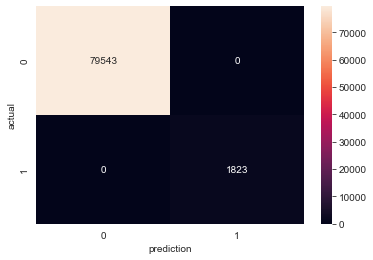

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

In [74]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       1.00      1.00      1.00      1823

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



> We can see from classification report above, the model is **overfitting**.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

In [76]:
def plot_roc_curve(true_y, y_prob, labels):
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)

    sns.lineplot(fpr,tpr,label=labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC Score = 1.0



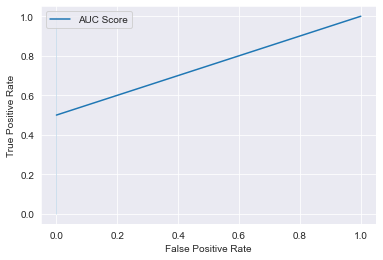

In [77]:
#plot roc auc
plot_roc_curve(y_test,y_pred,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred)}\n')
plt.show()

### OPTIMIZATION AND VALIDATION

In [78]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [79]:
one_fold_score = pd.DataFrame({'accuracy_train':[accuracy_score(y_train, model.predict(X_train))], 
                                'accuracy_test':[accuracy_score(y_test, model.predict(X_test))]})
one_fold_score

,accuracy_train,accuracy_test
0,1.0,1.0


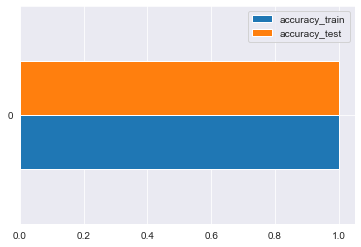

In [80]:
one_fold_score.plot(kind='barh')
plt.show()

In [81]:
cv = KFold(n_splits=5, shuffle=False)

In [82]:
scores_train = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)

In [83]:
for i,j in enumerate(scores_train):
    print(f'fold no. - {i}, score {round(j, 2)}')

fold no. - 0, score 1.0
fold no. - 1, score 1.0
fold no. - 2, score 1.0
fold no. - 3, score 1.0
fold no. - 4, score 1.0


In [84]:
scores_test = cross_validate(model, X_train, y_train, cv=5)

In [85]:
for i,j in enumerate(scores_test['test_score']):
    print(f'fold no. - {i}, score {round(j, 2)}')

fold no. - 0, score 1.0
fold no. - 1, score 1.0
fold no. - 2, score 1.0
fold no. - 3, score 1.0
fold no. - 4, score 1.0


### IMBALANCE DATA

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

In [87]:
#cek pres data
x = [round(i/len(dfr1)*100,2) for i in dfr1['cancelled'].value_counts()]
pd.DataFrame(data=x, index=['Not Cancel','Cancel'], columns=['Data (%)'])

,Data (%)
Not Cancel,97.81
Cancel,2.19


In [88]:
#jmlh data sebelum reshape
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (325463, 7)
X_test =  (81366, 7)
y_train =  (325463,)
y_test =  (81366,)


In [89]:
sm = NearMiss()
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [90]:
print('X_train after = ', X_train.shape)
print('y_train after = ', y_train.shape)

print('Label 1 after = ', sum(y_train == 1))
print('Label 0 after = ', sum(y_train == 0))

X_train after =  (325463, 7)
y_train after =  (325463,)
Label 1 after =  7082
Label 0 after =  318381


In [91]:
model_sm = LogisticRegression()
model_sm.fit(X_train_sm,y_train_sm)

#buat pred dengan oversampling
y_pred_sm = model_sm.predict(X_test)

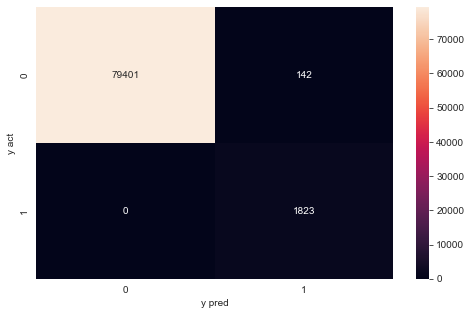

In [92]:
#cek hasil oversmapling dengan confusion matriks
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_sm),annot=True,fmt='.0f',ax=ax)
plt.xlabel('y pred')
plt.ylabel('y act')
plt.show()

In [93]:
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79543
           1       0.93      1.00      0.96      1823

    accuracy                           1.00     81366
   macro avg       0.96      1.00      0.98     81366
weighted avg       1.00      1.00      1.00     81366



model AUC Score = 0.9991074010283746



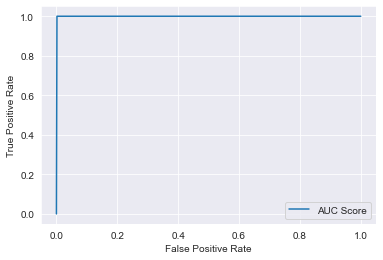

In [94]:
#plot roc auc
plot_roc_curve(y_test,y_pred_sm,'AUC Score')
print(f'model AUC Score = {roc_auc_score(y_test,y_pred_sm)}\n')
plt.show()

> The conclusion that can be drawn after validating and balancing the data we can see that the data has a high enough score so it can be concluded that the data is overfitting.

## EXPLORATORY DATA ANALYSIS

> At EDA we will focus more on analysis to answer questions contained in the Goals that have been determined.

In [95]:
dfr.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate_x,...,TransactionDate_y,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment,cluster_km
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,...,2011-02-10,302,2,5288.63,4,4,1,441,Big Spenders,0


### SALES TREND

In [96]:
c0 = dfr[(dfr['cluster_km'] == 0)]
c1 = dfr[(dfr['cluster_km'] == 1)]
c2 = dfr[(dfr['cluster_km'] == 2)]
c3 = dfr[(dfr['cluster_km'] == 3)]

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

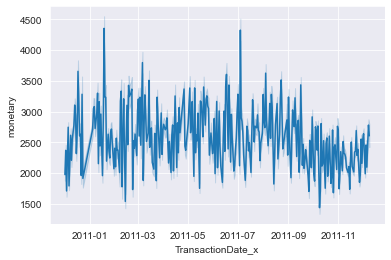

In [97]:
sns.lineplot(data = c0, x = 'TransactionDate_x', y = 'monetary')

> For c0 (Cluster 0) it tends to have the lowest monetary value at 1500 Pounds. For the highest monetary found in January 2011 and July 2011 ranging from 4400 pounds.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

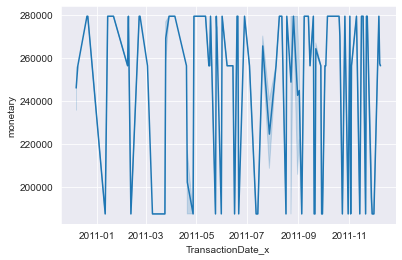

In [98]:
sns.lineplot(data = c1, x = 'TransactionDate_x', y = 'monetary')

> For c1 (Cluster 1) has the highest monetary reach 280000 Pounds. Monetary on c1 tends to be evenly distributed, it can be concluded that customers on c1 shop regularly.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

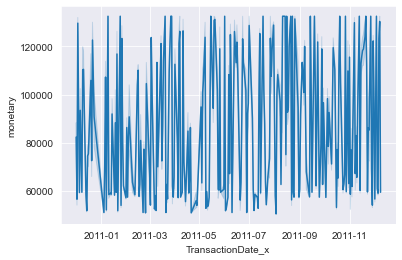

In [99]:
sns.lineplot(data = c2, x = 'TransactionDate_x', y = 'monetary')

> For c2 (Cluster 2) it has a fairly high monetary range above 120,000 Pounds. Monetary on c2 is almost the same as c1, but on c2 experienced several decreases in Feb 2011, May 2011 and Oct 2011.

<AxesSubplot:xlabel='TransactionDate_x', ylabel='monetary'>

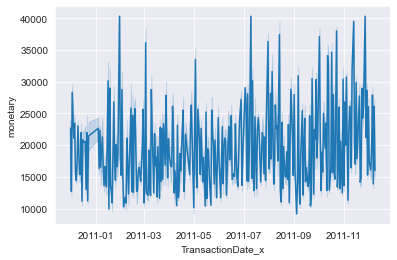

In [100]:
sns.lineplot(data = c3, x = 'TransactionDate_x', y = 'monetary')

> For c3 (Cluster 3) it has a fairly low monetary compared to c2 ranging from 10000-40000 Pounds.

### MOST SOLD AND CANCELLED PRODUCT

In [101]:
c0.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
3741,WORLD WAR 2 GLIDERS ASSTD DESIGNS,28968
213,ASSORTED COLOUR BIRD ORNAMENT,21131
1743,JUMBO BAG RED RETROSPOT,19760
2242,PACK OF 72 RETROSPOT CAKE CASES,19636
3655,WHITE HANGING HEART T-LIGHT HOLDER,17326


In [102]:
c1.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
176,CREAM HEART CARD HOLDER,5946
332,HEART OF WICKER SMALL,5661
601,RABBIT NIGHT LIGHT,4801
870,WHITE HANGING HEART T-LIGHT HOLDER,4530
331,HEART OF WICKER LARGE,4512


In [103]:
c2.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
1814,POPCORN HOLDER,11624
1245,JUMBO BAG RED RETROSPOT,11502
1243,JUMBO BAG PINK POLKADOT,7722
1249,JUMBO BAG STRAWBERRY,6675
1060,GROW A FLYTRAP OR SUNFLOWER IN TIN,4992


In [104]:
c3.groupby(["Description"], as_index=False)["Quantity"].sum().sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
2934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,23376
1704,PACK OF 12 LONDON TISSUES,13246
1340,JUMBO BAG RED RETROSPOT,11704
167,ASSORTED COLOUR BIRD ORNAMENT,11363
2029,RED HARMONICA IN BOX,10863


### QUANTITY PRODUCTS PURCHASED PER TRANSACTION

In [105]:
c0['Quantity'].mean()

9.106628094132285

In [106]:
c0.groupby(["InvoiceNo","CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,InvoiceNo,CustomerID,Quantity
15001,581483,16446.0,80995
1501,541431,12346.0,74215
14065,578841,13256.0,12540
9680,566595,18251.0,7824
4351,550344,12754.0,6432
...,...,...,...
17244,C570867,12607.0,-1228
16108,C552995,18133.0,-1350
16359,C556522,16938.0,-1515
15360,C541433,12346.0,-74215


> The average number of product units purchased per transaction is 9 units/transaction. The highest amount in one transaction is 12540 units/transaction. Transactions with Invoice No '581483' and '541431' have been cancelled. In other words

In [107]:
c1['Quantity'].mean()

114.97734402230742

In [108]:
c1.groupby(["InvoiceNo","CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,InvoiceNo,CustomerID,Quantity
79,563076,14646.0,14730
131,572035,14646.0,13392
105,567423,17450.0,12572
39,552883,14646.0,12266
28,548011,14646.0,11116
...,...,...,...
191,C568799,17450.0,-3
193,C579277,17450.0,-10
192,C568832,17450.0,-186
190,C567527,17450.0,-756


> The average product unit purchased for each transaction in c1 (Cluster 1) is 114 units/transaction. For the highest amount in one transaction, it reaches 14730 units/transaction.

In [109]:
c2['Quantity'].mean()

28.998499492475396

In [110]:
c2.groupby(["InvoiceNo","CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,InvoiceNo,CustomerID,Quantity
371,556917,12415.0,15049
513,563614,12415.0,12196
167,545475,12415.0,10272
366,556267,13694.0,9811
135,543989,12415.0,8384
...,...,...,...
998,C575224,17511.0,-1400
970,C569743,15769.0,-1600
931,C563577,17949.0,-2105
922,C562375,14911.0,-2270


> In contrast to c1, the average product unit purchased per transaction in c2 (Cluster 2) is 28 units/transaction. The highest amount in one transaction reaches 15,049 units/transaction, which is higher than the max transaction units in c1.

In [111]:
c3['Quantity'].mean()

18.031345962113658

In [112]:
c3.groupby(["InvoiceNo","CustomerID"], as_index=False)["Quantity"].sum().sort_values(by='Quantity',ascending=False)

,InvoiceNo,CustomerID,Quantity
1510,562439,12931.0,11848
795,550461,15749.0,9014
271,540815,15749.0,7044
1553,563074,12931.0,6098
1907,569815,15838.0,6016
...,...,...,...
3029,C572334,14607.0,-1416
3030,C572343,14607.0,-2344
2934,C564940,12931.0,-2518
2724,C550456,15749.0,-9014


> The average product unit purchased per transaction in c3 (Cluster 3) is 18 units/transaction. The highest amount in one transaction reached 11848 units/transaction.

### CLUSTER CONTRIBUTION TO COMPANY REVENEU

In [113]:
dfcc0 = dfr[(dfr['cluster_km'] == 0) & (dfr['Quantity'] < 0)]
dfcc1 = dfr[(dfr['cluster_km'] == 1) & (dfr['Quantity'] < 0)]
dfcc2 = dfr[(dfr['cluster_km'] == 2) & (dfr['Quantity'] < 0)]
dfcc3 = dfr[(dfr['cluster_km'] == 3) & (dfr['Quantity'] < 0)]

In [114]:
dfnc0 = dfr[(dfr['cluster_km'] == 0) & (dfr['Quantity'] > 0)]
dfnc1 = dfr[(dfr['cluster_km'] == 1) & (dfr['Quantity'] > 0)]
dfnc2 = dfr[(dfr['cluster_km'] == 2) & (dfr['Quantity'] > 0)]
dfnc3 = dfr[(dfr['cluster_km'] == 3) & (dfr['Quantity'] > 0)]

In [115]:
def reveneu_com (a,b):
    print('Monetary = ',round((a['TotalCost'].sum())*1,),'Pound')
    print('Mean Monetary = ',round((a['TotalCost'].mean())*1,),'Pound')
    print('Cancelled = ',round((b['TotalCost'].sum())*1,),'Pound')
    print('Mean Cancelled = ',round((b['TotalCost'].mean())*1,),'Pound')

In [116]:
#c0
reveneu_com(dfnc0,dfcc0)

Monetary =  5375023 Pound
Mean Monetary =  17 Pound
Cancelled =  -439530 Pound
Mean Cancelled =  -66 Pound


> At c0 (Cluster 0) the revenue generated through successful sales is 5,375,023 Pounds. For canceled transactions reached 439,530 Pounds. The sales average is £17/customer and the larger cancellations average £66/customer.

In [117]:
#c1
reveneu_com(dfnc1,dfcc1)

Monetary =  734414 Pound
Mean Monetary =  258 Pound
Cancelled =  -11004 Pound
Mean Cancelled =  -524 Pound


> At c1 (Cluster 1) the revenue generated through successful sales was 734,414 Pounds. This number is relatively smaller than c0 because only 3 customers are included in c1. For canceled transactions reached 11,004 Pounds. For an average sales of 256 Pounds/customer which is much higher than c0 and the average cancellation is greater than the average sales of 524 Pounds/Customer.

In [118]:
#c2
reveneu_com(dfnc2,dfcc2)

Monetary =  1145975 Pound
Mean Monetary =  52 Pound
Cancelled =  -74622 Pound
Mean Cancelled =  -110 Pound


> In c2 (Cluster 2) the revenue generated through successful sales is £1,145,975. For canceled transactions it reached 74,622 pounds. The sales average is £52/customer and the larger cancellations average £110/customer.

In [119]:
#c3
reveneu_com(dfnc3,dfcc3)

Monetary =  1655996 Pound
Mean Monetary =  34 Pound
Cancelled =  -86186 Pound
Mean Cancelled =  -55 Pound


> At c3 (Cluster 3) the revenue generated through successful sales was 1,655,996 Pounds. For canceled transactions reached 86,186 pounds. For the average sales reached 34 Pounds/customer and larger cancellations averaged 55 Pounds/Customer.

### RECENCY

In [120]:
rfm.describe()

,CustomerID,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,cluster_km
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.581199,93.053294,1898.459701,2.489021,2.512580,2.500000,0.077539
std,1722.390705,100.772139,232.471608,8219.345141,1.117084,1.119114,1.118162,0.467354
min,12346.000000,0.000000,1.000000,-4287.630000,1.000000,1.000000,1.000000,0.000000
25%,13812.750000,16.000000,17.000000,293.362500,1.000000,2.000000,1.750000,0.000000
50%,15300.500000,50.000000,42.000000,648.075000,2.000000,3.000000,2.500000,0.000000
75%,16778.250000,143.000000,102.000000,1611.725000,3.000000,4.000000,3.250000,0.000000
max,18287.000000,373.000000,7983.000000,279489.020000,4.000000,4.000000,4.000000,3.000000


> For the average recency in the data above it is around 91 days. The maximum recency for customers reaches 373 days after the last transaction

In [121]:
cr0 = rfm[(rfm['cluster_km'] == 0)]
cr1 = rfm[(rfm['cluster_km'] == 1)]
cr2 = rfm[(rfm['cluster_km'] == 2)]
cr3 = rfm[(rfm['cluster_km'] == 3)]

In [122]:
cr0.groupby("CustomerID", as_index=False)["recency"].sum().sort_values(by='recency',ascending=False).head()

,CustomerID,recency
340,12791.0,373
1355,14237.0,373
1706,14729.0,373
3980,17908.0,373
4023,17968.0,373


> At c0 (Cluster 0) has a fairly long recency. This may be related to monetary tends to be low.

In [123]:
cr1.groupby("CustomerID", as_index=False)["recency"].sum().sort_values(by='recency',ascending=False).head()

,CustomerID,recency
1,17450.0,8
0,14646.0,1
2,18102.0,0


> C1 (Cluster 1) has a fairly short recency with a max recency of 8 days. Customers who are in c1 have the highest monetary average compared to other clusters.

In [124]:
cr2.groupby("CustomerID", as_index=False)["recency"].sum().sort_values(by='recency',ascending=False).head()

,CustomerID,recency
11,16029.0,38
0,12415.0,24
3,14088.0,10
5,14156.0,9
10,15769.0,7


> C2 (Cluster 2) has a relatively short recency with a max recency of > 1 month, but for other customers it has a recency of < 1 month. Customers who are in c2 have the highest monetary average after c1.

In [125]:
cr3.groupby("CustomerID", as_index=False)["recency"].sum().sort_values(by='recency',ascending=False).head()

,CustomerID,recency
64,15749.0,235
8,12590.0,190
71,16180.0,100
0,12409.0,78
21,12939.0,64


> C3 (Cluster 3) has a relatively long recency. Customers who are at c3 have a monetary average that is not too high.

In [ ]:
dfr['RFMScore'] = pd.to_numeric(dfr['RFMScore'])

## SUMMARY

> How was the sales trend over the month?
> - c0 = sales trend on c0 mostly moves in the range of 1,500 - 3,500 Pounds
> - c1 = sales trend at c1 is said to be quite high with a range of 180,000 - 280,000 Pounds
> - c2 = sales trend on c2 moves in the range of 60,000 - 130,000 Pounds
> - c3 = sales trend on c3 mostly moves in the range of 10,000 - 30,000 Pounds

> What are the most frequently purchased products?
> - c0 = WORLD WAR 2 GLIDERS ASSTD DESIGNS 28968 units
> - c1 = 5946 CREAM HEART CARD HOLDER
> - c2 = 11624 POPCORN HOLDER
> - c3 = WORLD WAR 2 GLIDERS ASSTD DESIGNS 23376 units

> How many products does the customer purchase in each transaction?
> - c0 = For c0 has an average of 9 units per transaction
> - c1 = For c1 has an average of 114 units per transaction
> - c2 = For c2 has an average of 28 units per transaction
> - c3 = For c3 has an average of 18 units per transaction

> How does each cluster/group contribute to the company's revenue?
> - In the clustering that has been done, c1 becomes a cluster that gives a revenue of 258 Pounds for each customer. While the other clusters have a much smaller average revenue of 52 pounds for each customer. But on the other hand, the average cancellation rate in each cluster is twice the average sales.

> What are the date intervals between transactions?
> - If we talk about recency, c1 has the lowest recency compared to other clusters.

> Based on your findings, what strategy could you recommend for the business to gain more profit?
> - To be able to generate maximum profit, companies can increase the number of sales by reducing the number of product cancellations. Product cancellations generally occur because the product is not ready in stock, thus encouraging the customer to cancel the product.
> - c0 = Can provide several promos to attract shopping interest
> - c1 = Can provide attractive offers in large quantities so that the frequency of shopping increases
> - c2 = Can provide loyalty programs that provide benefits to customers who are in c2 when shopping
> - c3 = Can provide several promos to attract shopping interest

In [127]:
dfr.to_csv("data_dfr.csv", index=0)


In [128]:
rfm.to_excel('rfm.xlsx', index=0)

In [129]:
df.to_excel('df.xlsx', index=0)